# Import library

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [25]:
np.set_printoptions(threshold='nan')

# Load data

In [2]:
data = pd.read_csv('train.csv')
y_data = data['SalePrice']
x_data = data.loc[:, data.columns != 'SalePrice']

# EDA - exploratory data analysis

## house price distribution

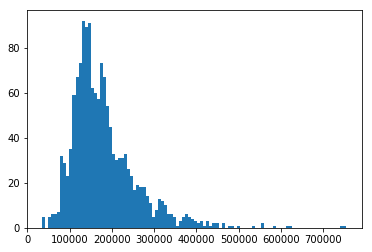

In [3]:
plt.hist(y_data, bins=100)
plt.show()

## feature correlation

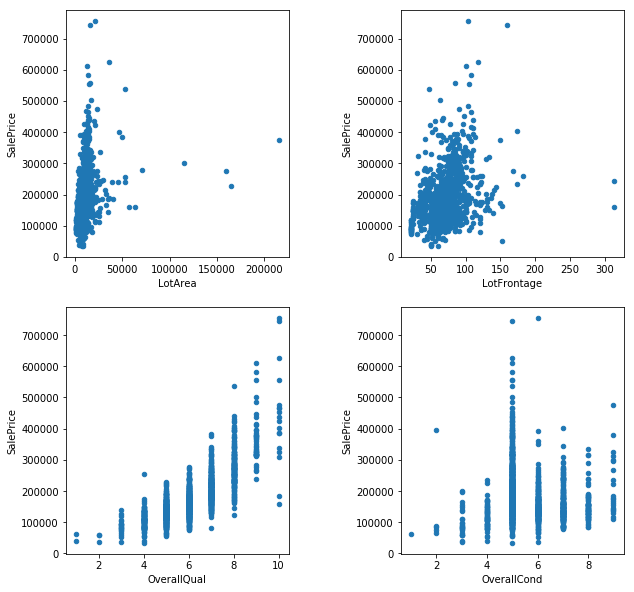

In [4]:
# scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.subplots_adjust(wspace=0.5)
data.plot(x='LotArea',y='SalePrice',ax=axes[0,0],kind='scatter')
data.plot(x='LotFrontage',y='SalePrice',ax=axes[0,1],kind='scatter')
data.plot(x='OverallQual',y='SalePrice',ax=axes[1,0],kind='scatter')
data.plot(x='OverallCond',y='SalePrice',ax=axes[1,1],kind='scatter')

plt.show()

## Check nan values

In [5]:
print(x_data.shape)
s = x_data.isnull().sum()
print(s.loc[s > 0])

(1460, 80)
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Define data preprocessing func

In [17]:
def DataPreprocess(x_data):
    #----------drop columns which has too many nan in training data---------------# 
    x_data_sel = x_data.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt'],axis=1).copy()
    #----------drop columns which has too many nan in training data---------------#
    
    #-----------------handle missing values------------------------------------#
    x_data_sel['Utilities'].fillna(x_data_sel['Utilities'].mode()[0], inplace=True)
    
    x_data_sel['LotFrontage'].fillna(x_data_sel['LotFrontage'].mean(), inplace=True)

    x_data_sel['MasVnrType'].fillna('None', inplace=True)
    x_data_sel['MasVnrArea'].fillna(0, inplace=True)

    ## Basement : fill na with no basement
    x_data_sel['BsmtQual'].fillna('NoBsmt', inplace=True)
    x_data_sel['BsmtCond'].fillna('NoBsmt', inplace=True)
    x_data_sel['BsmtExposure'].fillna('NoBsmt', inplace=True)
    x_data_sel['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    x_data_sel['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    x_data_sel['BsmtFinSF1'].fillna(0, inplace=True)
    x_data_sel['BsmtFinSF2'].fillna(0, inplace=True)
    x_data_sel['BsmtUnfSF'].fillna(0, inplace=True)
    x_data_sel['TotalBsmtSF'].fillna(0, inplace=True)
    x_data_sel['BsmtFullBath'].fillna(0, inplace=True)
    x_data_sel['BsmtHalfBath'].fillna(0, inplace=True)

    x_data_sel['Electrical'].fillna(x_data_sel['Electrical'].mode()[0], inplace=True)

    x_data_sel['FireplaceQu'].fillna('NoFireplace', inplace=True)

    ## Garage : fill na with no garage
    x_data_sel['GarageType'].fillna('NoGarage', inplace=True)
    x_data_sel['GarageQual'].fillna('NoGarage', inplace=True)
    x_data_sel['GarageCond'].fillna('NoGarage', inplace=True)
    x_data_sel['GarageFinish'].fillna('NoGarage', inplace=True)
    x_data_sel['GarageCars'].fillna(0, inplace=True)
    x_data_sel['GarageArea'].fillna(0, inplace=True)
    
    x_data_sel['KitchenQual'].fillna(x_data_sel['KitchenQual'].mode()[0], inplace=True)
    
    x_data_sel['Functional'].fillna(x_data_sel['Functional'].mode()[0], inplace=True)
    #-----------------handle missing values------------------------------------#

    #------handle ordered categorical variable (18) : sequence encode-----#
    mapDic = {
        'Utilities' : {'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3},
        'LandSlope' : {'Gtl':0, 'Mod':1, 'Sev':2},
        'ExterQual' : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
        'ExterCond' : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
        'BsmtQual' : {'NoBsmt':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
        'BsmtCond' : {'NoBsmt':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
        'BsmtExposure' : {'NoBsmt':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
        'BsmtFinType1' : {'NoBsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
        'BsmtFinType2' : {'NoBsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
        'HeatingQC' : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
        'CentralAir' : {'N':0, 'Y':1},
        'KitchenQual' : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
        'Functional' : {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7},
        'FireplaceQu' : {'NoFireplace':0, 'Po':1, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
        'GarageFinish' : {'NoGarage':0, 'Unf':1, 'RFn':2, 'Fin':3},
        'GarageQual' : {'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
        'GarageCond' : {'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
        'PavedDrive' : {'N':0, 'P':1, 'Y':2}
    }

    for k,v in mapDic.items() :
        x_data_sel[k] = x_data_sel[k].map(v)
    #------handle ordered categorical variable (18) : sequence encode-----#


    #------handle unordered categorical variable (21) : one-hot encode----#
    catVars = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
           'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
           'Foundation', 'Heating', 'GarageType', 'SaleType', 'SaleCondition',
           'Neighborhood','Electrical']
    for catVar in catVars: 
        onehot = pd.get_dummies(x_data_sel[catVar])
        newCols = [catVar + '_' + str(col) for col in onehot.columns]
        x_data_sel[newCols] = onehot
        x_data_sel.drop([catVar], axis=1, inplace=True)
        
        
    return x_data_sel

# Preprocess data

In [27]:
x_data_proc = DataPreprocess(x_data)

print(x_data.shape)
print(x_data_proc.shape)

(1460, 80)
(1460, 230)


In [28]:
x_data_proc.head()

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,65.0,8450,3,0,7,5,2003,2003,196.0,3,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,3,0,6,8,1976,1976,0.0,2,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,3,0,7,5,2001,2002,162.0,3,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,3,0,7,5,1915,1970,0.0,2,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,3,0,8,5,2000,2000,350.0,3,...,0,0,0,0,0,0,0,0,0,1


# Split data to training, validation and testing data

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_proc, y_data, test_size=0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1022, 230)
(1022,)
(438, 230)
(438,)


# Training Model

## Define result checking function

In [9]:
def CheckResult(pred, true):
    plt.scatter(y_pred, y_test)
    plt.show()
    
    loss = np.sqrt(np.sum((np.log(y_pred) - np.log(y_test)) ** 2) / len(y_test))
    print(loss)

## Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

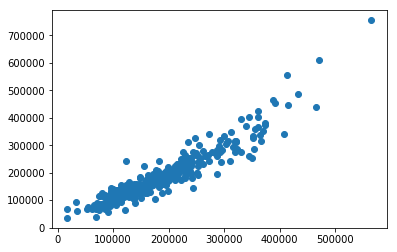

0.1794277580064933


In [11]:
y_pred = linearReg.predict(x_test)
CheckResult(y_pred, y_test)

## Random forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
rdForestReg = RandomForestRegressor()
rdForestReg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

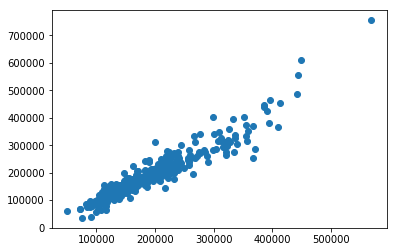

0.140856662403513


In [13]:
# predict
y_pred = rdForestReg.predict(x_test)
CheckResult(y_pred, y_test)

# GBM

In [14]:
# fit model GBM (gradian boosting machine)
from sklearn.ensemble import GradientBoostingRegressor
gbmReg = GradientBoostingRegressor()
gbmReg.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

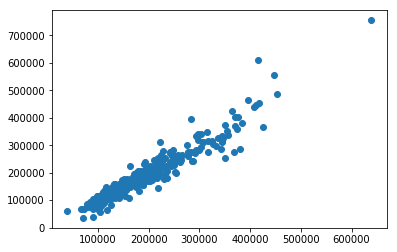

0.13328333483730873


In [15]:
y_pred = gbmReg.predict(x_test)
CheckResult(y_pred, y_test)

In [31]:
# fit model XGBoost

In [32]:
# adjust hyperparameter
## cross validation or grid search

# Load real testing data

In [ ]:
data_test = pd.read_csv('test.csv')
print(data_test.columns)

x_test = DataPreprocess(data_test)
print(x_test.shape)

s = x_test.isnull().sum()
print(s.loc[s > 0])

# Add missing columns in the training data to testing
cols = set( x_train.columns ) - set( x_test.columns )
for c in cols:
    x_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
x_test = x_test[x_train.columns]

print(x_test.shape)

In [9]:
# save predic results to csv file
pd.DataFrame({'Id' : data_test['Id'],'SalePrice' : np.exp(y_pred)}).to_csv('myPred.csv', index=False)